##  Feature Extraction and Visualisations: Overview
---------------
This notebook provides an insight into how features were extracted from the data collected during the experimental routine. It also provides visualisation which were used to explore the data in an attempt to identify those which would contribute the most to a classifier. All techniques used in the feature extraction process are later used during the testing and validation stages of the project. 

In [1]:
# importing all relevant packages 
import h5py
import numpy as np 
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix 

import pandas as pd
from collections import Counter
import seaborn as sns

# Additional Functions saved in a separate file (To be provided)
import test_functions as func

In [2]:
# Some high level settings to determine whether normalisation and select K-best is applied
settings_dict = {
    'normalise':True, 
    'k_best':False, 
    'all_objects':False
}

In [3]:
# Creation of a dictionary to map object names to file locations and object reference 
object_path_dict = {}

object_path_dict['spoolsolder'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_SpoolSolder_tactile.h5',
                                  "object": "SpoolSolder"}
object_path_dict['brush'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_brush_tactile.h5',
                                  "object": "brush"}
object_path_dict['screwdriver'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_screwDriver_tactile.h5',
                                  "object": "screwDriver"}
object_path_dict['adversarialpipe'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_adversarialPipe_tactile.h5',
                                  "object": "adversarialPipe"}
object_path_dict['teddybear'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_teddyBear_tactile.h5',
                                  "object": "teddyBear"}
object_path_dict['adversarial'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_adversarial_tactile.h5',
                                  "object": "adversarial"}
object_path_dict['tennisball'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_tennisBall_tactile.h5',
                                  "object": "tennisBall"}
object_path_dict['metalbox'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_metalBox_tactile.h5',
                                  "object": "metalBox"}
object_path_dict['legoduplo'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_legoDuplo_tactile.h5',
                                  "object": "legoDuplo"}
object_path_dict['marblenet'] = {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_marbleNet_tactile.h5',
                                  "object": "marbleNet"}

object_path_dict['marker']= {"file":'/home/elliot/catkin_ws/data/labels/slipDataset_marker_tactile.h5',
                                  "object": "marker"}

print(f"{len(object_path_dict)} objects available for comparison")

11 objects available for comparison


In [4]:
# Example of a file being accessed using the dictionary
hf = h5py.File(object_path_dict['marblenet'.lower()]['file'],'r')

In [5]:
#  Functions to demonstrate the files available for individual objects
def print_all_groups(name):
    print(name)
    return

def print_experiment_groups(name): 
    if len(name.split('/')) ==3:
        print(name)
    return 

def print_single_experiment_groups(name): 
    # Files available for an individual pose and experiment can be viewed by changing the values below     
    if len(name.split('/')) >= 4: 
        if name.split('/')[1] == 'Pose2' and name.split('/')[2] == 'Exp3':
            print(name)
    return

In [6]:
hf.visit(print_all_groups)
hf.close()

marbleNet
marbleNet/Pose1
marbleNet/Pose1/Exp1
marbleNet/Pose1/Exp1/tactile_changes_label
marbleNet/Pose1/Exp1/tactile_data_normalized
marbleNet/Pose1/Exp1/tactile_data_normalized/x
marbleNet/Pose1/Exp1/tactile_data_normalized/y
marbleNet/Pose1/Exp1/tactile_data_normalized/z
marbleNet/Pose1/Exp1/tactile_data_raw
marbleNet/Pose1/Exp1/tactile_data_raw/x
marbleNet/Pose1/Exp1/tactile_data_raw/y
marbleNet/Pose1/Exp1/tactile_data_raw/z
marbleNet/Pose1/Exp1/tactile_timestamps
marbleNet/Pose1/Exp10
marbleNet/Pose1/Exp10/tactile_changes_label
marbleNet/Pose1/Exp10/tactile_data_normalized
marbleNet/Pose1/Exp10/tactile_data_normalized/x
marbleNet/Pose1/Exp10/tactile_data_normalized/y
marbleNet/Pose1/Exp10/tactile_data_normalized/z
marbleNet/Pose1/Exp10/tactile_data_raw
marbleNet/Pose1/Exp10/tactile_data_raw/x
marbleNet/Pose1/Exp10/tactile_data_raw/y
marbleNet/Pose1/Exp10/tactile_data_raw/z
marbleNet/Pose1/Exp10/tactile_timestamps
marbleNet/Pose1/Exp11
marbleNet/Pose1/Exp11/tactile_changes_label
m

In [7]:

hf = h5py.File(object_path_dict['marblenet'.lower()]['file'],'r')
hf.visit(print_experiment_groups)
hf.close()

marbleNet/Pose1/Exp1
marbleNet/Pose1/Exp10
marbleNet/Pose1/Exp11
marbleNet/Pose1/Exp12
marbleNet/Pose1/Exp13
marbleNet/Pose1/Exp14
marbleNet/Pose1/Exp15
marbleNet/Pose1/Exp3
marbleNet/Pose1/Exp4
marbleNet/Pose1/Exp5
marbleNet/Pose1/Exp6
marbleNet/Pose1/Exp7
marbleNet/Pose1/Exp8
marbleNet/Pose1/Exp9
marbleNet/Pose2/Exp1
marbleNet/Pose2/Exp10
marbleNet/Pose2/Exp11
marbleNet/Pose2/Exp12
marbleNet/Pose2/Exp15
marbleNet/Pose2/Exp2
marbleNet/Pose2/Exp3
marbleNet/Pose2/Exp5
marbleNet/Pose2/Exp6
marbleNet/Pose2/Exp7
marbleNet/Pose2/Exp8
marbleNet/Pose2/Exp9
marbleNet/Pose3/Exp1
marbleNet/Pose3/Exp11
marbleNet/Pose3/Exp12
marbleNet/Pose3/Exp13
marbleNet/Pose3/Exp14
marbleNet/Pose3/Exp15
marbleNet/Pose3/Exp2
marbleNet/Pose3/Exp3
marbleNet/Pose3/Exp4
marbleNet/Pose3/Exp5
marbleNet/Pose3/Exp6
marbleNet/Pose3/Exp7
marbleNet/Pose3/Exp9
marbleNet/Pose4/Exp10
marbleNet/Pose4/Exp11
marbleNet/Pose4/Exp13
marbleNet/Pose4/Exp14
marbleNet/Pose4/Exp15
marbleNet/Pose4/Exp2
marbleNet/Pose4/Exp3
marbleNet/Pose

In [8]:
hf =h5py.File(object_path_dict['marblenet'.lower()]['file'],'r')
hf.visit(print_single_experiment_groups)
hf.close()

marbleNet/Pose2/Exp3/tactile_changes_label
marbleNet/Pose2/Exp3/tactile_data_normalized
marbleNet/Pose2/Exp3/tactile_data_normalized/x
marbleNet/Pose2/Exp3/tactile_data_normalized/y
marbleNet/Pose2/Exp3/tactile_data_normalized/z
marbleNet/Pose2/Exp3/tactile_data_raw
marbleNet/Pose2/Exp3/tactile_data_raw/x
marbleNet/Pose2/Exp3/tactile_data_raw/y
marbleNet/Pose2/Exp3/tactile_data_raw/z
marbleNet/Pose2/Exp3/tactile_timestamps


In [9]:
def plot_averages(obj, pose, exp): 
    """
    A function used for data exploration which averages x/y/z readings by each individual taxel
    """
    try: 
        hf = h5py.File(object_path_dict[obj.lower()]['file'],'r')

        obj_string = object_path_dict[obj.lower()]['object'] + '/Pose' + str(pose) + '/Exp' + str(exp) + '/tactile_data_raw/'
        x_data = np.array(hf[obj_string + 'x'])
        y_data = np.array(hf[obj_string + 'y'])
        z_data = np.array(hf[obj_string + 'z'])
        x_data_avg = x_data.mean(axis = 1)
        y_data_avg = y_data.mean(axis = 1)
        z_data_avg = z_data.mean(axis = 1)
        plt.plot(x_data_avg, label = 'x')
        plt.plot(y_data_avg, label = 'y')
        plt.plot(z_data_avg, label = 'z')
        plt.legend()
        hf.close()
    except: 
        print("File not found!")

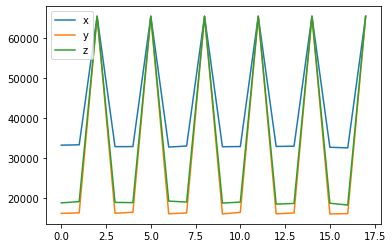

In [10]:
# Example of plot_averages being used to visualise data for a single experiment for a given object 
plot_averages("teddybear",pose = 1,exp = 3)

In [11]:
def extract_features(object_list): 
    """
    A function which extracts all available files for objects given in a provided list. 
    The function returns an array of features, a list of objects and an array of the extracted data for visualisation.
    The array of features returned is representative of the full experimental routine for a single pose and single grasp.
    """
    
    features = []
    labels = []
    x_full_history = []
    y_full_history = []
    z_full_history = [] 
    tactile_sum = []
    
    files_extracted = 0 
    
    # Looping through every object provided in the given list     
    for obj in object_list: 
        
        # Accessing the relevant files for the provided object          
        file_path = object_path_dict[obj.lower()]['file']
        print("\n" , file_path)
        
        # Looping through all possible poses to extract the data         
        for pose in range(1,6):
            
            # A list is kept for any experiments which do not have any data available 
            missing_exp = [] 
            
            # Looping through all possible experiments within each pose 
            for exp in range(1,16):
                
                # Try / Except process is used to handle missing files 
                try: 
                    hf = h5py.File(file_path,'r')        
                    obj_string = object_path_dict[obj.lower()]['object'] + '/Pose' + str(pose) + '/Exp' + str(exp)
                    x_data = np.array(hf[obj_string + '/tactile_data_raw/x'])
                    y_data = np.array(hf[obj_string + '/tactile_data_raw/y'])
                    z_data = np.array(hf[obj_string + '/tactile_data_raw/z'])

                    # Using initial frame as the zero baseline for all readings 
                    x_data = x_data.T
                    y_data = y_data.T
                    z_data = z_data.T

                    x_data = x_data - x_data[0]
                    y_data = y_data - y_data[0]
                    z_data = z_data - z_data[0]

                    x_data = x_data.T
                    y_data = y_data.T
                    z_data = z_data.T

                    tactile_data = np.array(hf[obj_string + '/tactile_changes_label'])
                    hf.close()

                    
                    #                     ----------------------------------
                    """ 
                    Check if any tactile changes are observed. 
                    If no tactile changes are recorded in the file provided it is categorised as missing data.  
                    """

                    tactile_sum.append(np.sum(tactile_data))
                    if np.sum(tactile_data) == 0: 
    #                         print(f"----- No Tactile Changes observed for {obj.lower()} in pose {pose}, experiment {exp}")
                        missing_exp.append(exp)
                        continue
                    
    #                     ----------------------------------
                    """ 
                    Collecting simple distribution metrics for the values across all taxels (min/max)
                    """                                        
                    
                    x_min = np.min(x_data)
                    x_max = np.max(x_data)
                    y_min = np.min(y_data)
                    y_max = np.max(y_data)
                    z_min = np.min(z_data)
                    z_max = np.max(z_data)
                    

    #                     ----------------------------------
                    """ 
                    Collecting simple distribution metrics for the mean values of each taxel (min/max/std)
                    """
                    
                    #  All individual force readings (x/y/z) are averaged across the whole experimental routine       
                    x_data_avg = x_data.mean(axis = 1)
                    x_avg_min = min(x_data_avg)
                    x_avg_max = max(x_data_avg)
                    x_avg_std = np.std(x_data_avg)

                    y_data_avg = y_data.mean(axis = 1)
                    y_avg_min = min(y_data_avg)
                    y_avg_max = max(y_data_avg)
                    y_avg_std = np.std(y_data_avg)

                    z_data_avg = z_data.mean(axis = 1)
                    z_avg_max = max(z_data_avg)
                    z_avg_min = min(z_data_avg)
                    z_avg_std = np.std(z_data_avg)

    #                     ----------------------------------
                    """
                    This section identifies the maximum sum of z values and scans either side to determine a window
                    of the number of frames where best contact has been made    
                    """

                    # index of frame with maximum sum of recorded z values
                    z_total_index = np.argmax(np.sum(z_data,axis=0))

                    # Maximum sum of z values recorded across the experimental routine
                    z_total_max = np.max(np.sum(z_data,axis = 0))

                    # Flag used to determine whether the change in recorded values is within a predefined threshold
                    z_perc_change = True

                    # Counter for the number of frames where the sum of z values is within the given tolerance / threshold
                    i = 0
                    threshold = 0.001

                    # Scanning previous frames to see if the sum of z values is within the given threshold 
                    while z_perc_change and (z_total_index - i)>0: 
                        z_total = np.sum(z_data,axis = 0)[z_total_index - i]
                        z_perc_change = func.percentage_change_tolerance(z_total_max, z_total, t = threshold)
                        if z_perc_change: 
                            i += 1

                    j = 0
                    # Scanning proceeding frames to see if the sum of z values is within the given threshold
                    z_perc_change = True
                    while z_perc_change and (z_total_index + j) < len((np.sum(z_data,axis = 0))): 
                        z_total = np.sum(z_data,axis = 0)[z_total_index + j]
                        z_perc_change = func.percentage_change_tolerance(z_total_max, z_total, t = threshold)
                        if z_perc_change: 
                            j += 1

                    # The total number of frames around the maximum point which are within the given threshold
                    total_frames_at_max = i + j 
                    
    #                     ----------------------------------
                    """
                    This section identifies the maximum sum of x/y/z values for a single frame across all taxels     
                    """
                    x_total_min = np.min(np.sum(x_data,axis = 0)) 
                    x_total_max = np.max(np.sum(x_data,axis = 0)) 
                    y_total_min = np.min(np.sum(y_data,axis = 0))
                    y_total_max = np.max(np.sum(y_data, axis = 0))
                    z_total_max = np.max(np.sum(z_data, axis = 0)) 
                    z_total_min = np.min(np.sum(z_data, axis = 0))  

                    x_sum_std = np.std(np.sum(x_data,axis = 0))
                    y_sum_std = np.std(np.sum(y_data,axis = 0))
                    z_sum_std = np.std(np.sum(z_data,axis = 0))

                    
    #                     ----------------------------------
                    """
                    Identifying the number of taxels engaged at the point of maximum deformation (Z only)   
                    """
                    initial_taxels = z_data[:,0]
                    max_taxels = z_data[:,z_total_index]
                    comparison = max_taxels - initial_taxels
                    # This parameter has been adjusted from 1 up to 200 to identify the optimum value for classification
                    compressed_taxels = np.sum(comparison > 50) 

    #                      ----------------------------------
                    """
                    Calculating the maximum number of consecutive changes/ stable frames as an indicator of flexibility. 
                    Also calculating the total number of recorded changes over the length of the observed experimental routine. 
                    """                   

                    # The total number of consecutive changes recorded during the experimental routine
                    max_changes = func.get_maximum_consecutive_changes(tactile_data)

                    # The total number of consecutive frames with no change in tactile information recorded during the experimental routine 
                    max_stability = func.get_maximum_consecutive_stability(tactile_data)

                    # The proportion of the experimental routine which records a change in tactile information 
                    change_perc = np.sum(tactile_data) / len(tactile_data)
            

                    
    #                      ----------------------------------
                    " Duration gives an indicator of failed attempts, as some objects may fail more easily than others"
                    duration = x_data.shape[1]


                    " Uses duration as an indicator for partially failed attempts"
                    if duration < 200: 
                        partial_contact = 5 
                    elif duration <400: 
                        partial_contact = 4
                    elif duration < 600: 
                        partial_contact = 3
                    elif duration < 800: 
                        partial_contact = 2
                    elif duration < 1000: 
                        partial_contact = 1
                    else: 
                        partial_contact = 0 

                    
           
    #                      ----------------------------------
                    " Features which represent the balance between shear and normal forces to gather information on texture / friction"

                    # The first apporach looks at the maximum of the average values for each individual force
                    force_ratio1 = z_avg_max/ math.sqrt(y_avg_max**2 + x_avg_max**2)


                    # The second approach looks at the difference in values at the same point during the Experimental Procedure 
                    z_change= z_data[:,z_total_index] - z_data[:,0]
                    z_change = np.sum(np.square(z_change))

                    x_change= x_data[:,z_total_index] - x_data[:,0]
                    x_change = np.sum(np.square(x_change))

                    y_change= y_data[:,z_total_index] - y_data[:,0]
                    y_change = np.sum(np.square(y_change))


                    force_ratio2 = z_change / (y_change + x_change)



    #                      ----------------------------------                    
                    """
                    Information about the overall spread of the readings from all taxels (st.dev)
                    """
                    x_all = [x.item() for x in x_data.flatten()]
                    y_all = [y.item() for y in y_data.flatten()]
                    z_all = [z.item() for z in z_data.flatten()]
                    

                    
                    x_full_std = np.std(x_all)
                    y_full_std = np.std(y_all)
                    z_full_std = np.std(z_all)
                   
                    
    #                      ----------------------------------                    

                    """
                    Appending all data for inspection purposes
                    """
                    x_full_history = np.append([x.item() for x in x_data.flatten()],x_full_history)
                    y_full_history = np.append([y.item() for y in y_data.flatten()],y_full_history)
                    z_full_history = np.append([z.item() for z in z_data.flatten()],z_full_history)


    #                      ----------------------------------


                    """
                    Comparison of vectors of shear forces for adjacent taxels
                    """
                    # Transposing data for easier manipulation
                    x_data = x_data.T
                    y_data = y_data.T
                    z_data = z_data.T

                    z_index = np.argmax(z_data[z_total_index,:])

                    # First approach compares maximum taxel to all surrounding taxels

                    # A dictionary is created which records all possible surrounding taxels based on location on the sensor
                    valid_taxels = {}
                    valid_taxels['up'] = True
                    valid_taxels['down'] = True
                    valid_taxels['left'] = True
                    valid_taxels['right'] = True

                    # Check for taxels which are on the edges of the sensor
                    if z_index % 3 == 0: 
                        valid_taxels['left'] = False
                    if z_index in [15,16,17]: 
                        valid_taxels['up'] = False 
                    if z_index in [0,1,2]: 
                        valid_taxels['down'] = False
                    if z_index %3 == 2:
                        valid_taxels['right'] = False
                                        
                   
                    # Lists to be populated with values of x and y forces compared to initial forces 
                    x_vec = []
                    y_vec = []

                    # Values for the central (maximum) taxel
                    x = x_data[z_total_index,z_index]-x_data[0,z_index]
                    y = y_data[z_total_index,z_index]-y_data[0,z_index]
                    x_vec.append(x)
                    y_vec.append(y)

                    # Extracting values for surrounding taxels where possible
                    for i in valid_taxels.keys():
                        if valid_taxels[i] and i == 'up': 
                            x = x_data[z_total_index,z_index +3]-x_data[0,z_index +3]
                            y = y_data[z_total_index,z_index +3]-y_data[0,z_index +3]
                        elif valid_taxels[i] and i == 'down':
                            x = x_data[z_total_index,z_index -3]-x_data[0,z_index -3]
                            y = y_data[z_total_index,z_index -3]-y_data[0,z_index -3]
                        elif valid_taxels[i] and i == 'right':
                            x = x_data[z_total_index,z_index +1]-x_data[0,z_index +1]
                            y = y_data[z_total_index,z_index +1]-y_data[0,z_index +1]
                        elif valid_taxels[i] and i == 'left':
                            x = x_data[z_total_index,z_index -1]-x_data[0,z_index -1]
                            y = y_data[z_total_index,z_index -1]-y_data[0,z_index -1]
                        else: 
                            x = 0
                            y = 0 
                        x_vec.append(x)
                        y_vec.append(y)

                    # Conversion to polar co-ordinates
                    rho, phi = func.cart2pol(x_vec,y_vec)

                    # Creating a matrix which compares each surrounding taxel to the max taxel
                    for i in range(1,len(phi)): 
                        # Vectors are compared using compare_vectors function
                        vec_comparison = func.compare_vectors(phi,0,i)
                        if i == 1: 
                            vec_array = np.array(vec_comparison)
                        else: 
                            vec_array = np.concatenate((vec_array, vec_comparison),axis =0)

                    vec_array = vec_array.reshape(-1,4)
                    vec_array = np.sum(vec_array, axis =0)

                    # Scores are calculated based on the number of taxels surrounding the central taxel which are in the same direction or differing directions as the central taxel
                    xy_corr = 0.25*vec_array[0]
                    if vec_array[1] > 1: 
                        x_corr = 0.25 
                    else: 
                        x_corr = 0 

                    if vec_array[2] > 1: 
                        y_corr = 0.25 
                    else: 
                        y_corr = 0 

                    xy_neg_corr = 0.25*vec_array[3]

    #                      ----------------------------------


                    """
                    View of overall direction of all forces during maximum contact 
                    """
                    # The second approach takes a look at all taxels at the point of maximum contact and simply looks to identify evidence of symmetry or parallel forces in action
                    x_vec = x_data[z_total_index,:].tolist()
                    y_vec = y_data[z_total_index,:].tolist()
                    rho, phi = func.cart2pol(x_vec,y_vec)

                    rho = np.array(rho)
                    phi = np.array(phi)
                    symmetry, parallel = func.compare_all_vectors(phi, rho)




    #                      ----------------------------------
                    """
                    Breaking data down into windows of predetermined length
                    """
            
                    frequency = 180 # Frequency of the tactile sensor used 
                    window_size = 100
                    window_size_t = window_size / frequency # Window size in real time (seconds)
                    total_frames = x_data.shape[0]
                    total_windows = total_frames // window_size + 1
                    
                    #  Checking whether taxels are compressed across the experimental routine                
                    compression_check = z_data > 50
                    
                    average_compression_list = []
                    average_x_total = []
                    average_y_total = []
                    average_z_total = []
                    
                    for i in range(0,total_windows):
                        segment_start = i*window_size
                        segment_end = (i+1)*window_size
                        if segment_end > total_frames: 
                            segment_end = total_frames
                        segment_length = segment_end - segment_start
                        
                        if segment_length == 0: 
                            continue 
                        
                        #  Extracting data within each window.                       
                        x_data_segment = x_data[segment_start:segment_end,:]
                        y_data_segment = y_data[segment_start:segment_end,:]
                        z_data_segment = z_data[segment_start:segment_end,:]
                        compression_segment = compression_check[segment_start:segment_end,:]
                        
                        total_compressed = np.sum(compression_segment)
                        average_compressed = total_compressed/segment_length 
                        average_compression_list.append(average_compressed)
                        
                        x2_total = np.sum(x_data_segment**2)/segment_length
                        y2_total = np.sum(y_data_segment**2)/segment_length
                        z2_total = np.sum(z_data_segment**2)/segment_length 
                        
                        average_x_total.append(x2_total)
                        average_y_total.append(y2_total)
                        average_z_total.append(z2_total)
                        
                    # Extracting features based on compression 
                    max_compression = np.max(average_compression_list)
                    mean_compression = np.mean(average_compression_list)
                    std_compression = np.std(average_compression_list)
                    most_commonly_compressed = max(set(average_compression_list),key = average_compression_list.count)
                    average_compression_list = np.array(average_compression_list)
                    windows_at_most_common = np.sum(average_compression_list == most_commonly_compressed )/len(average_compression_list)
                    
                    # Results for forces are split into three segments 
                    total_segments = len(average_x_total) 
                    
                    # Time in seconds of different motions / size of each window in seconds               
                    # Initial grip and raise is approximately 3 seconds long                     
                    first_period = int(3.0/window_size_t) 
                    
                    # Second phase of raising and rotating the object goes from c. 3 seconds --> 11 seconds                      
                    second_period = int(11.0/window_size_t)

                    # Extracting features based on x/y/z readings in each window                     
                    if second_period >= total_windows: 
                        second_period = total_windows
                        mean_x2_3 = 0
                        mean_y2_3 = 0
                        mean_z2_3 = 0
                        std_x2_3 = 0
                        std_y2_3 = 0
                        std_z2_3 = 0
                    else: 
                        # Features for the "shake" phase of the Experimental Routine                         
                        mean_x2_3 = np.mean(average_x_total[second_period:])
                        mean_y2_3 = np.mean(average_y_total[second_period:])
                        mean_z2_3 = np.mean(average_z_total[second_period:])

                        std_x2_3 = np.std(average_x_total[second_period:])
                        std_y2_3 = np.std(average_y_total[second_period:])
                        std_z2_3 = np.std(average_z_total[second_period:])
                     
                    if first_period >= total_windows: 
                        first_period = total_windows
                        mean_x2_2 = 0
                        mean_y2_2 = 0
                        mean_z2_2 = 0
                        std_x2_2 = 0
                        std_y2_2 = 0
                        std_z2_2 = 0
                    else: 
                        # Features for the "raise and rotate" phase of the Experimental Routine
                        mean_x2_2 = np.mean(average_x_total[first_period:second_period])
                        mean_y2_2 = np.mean(average_y_total[first_period:second_period])
                        mean_z2_2 = np.mean(average_z_total[first_period:second_period])

                        std_x2_2 = np.std(average_x_total[first_period:second_period])
                        std_y2_2 = np.std(average_y_total[first_period:second_period])
                        std_z2_2 = np.std(average_z_total[first_period:second_period])
                   
                    # Features for the "grip and lift" phase of the Experimental routine     
                    mean_x2_1 = np.mean(average_x_total[0:first_period])
                    mean_y2_1 = np.mean(average_y_total[0:first_period])
                    mean_z2_1 = np.mean(average_z_total[0:first_period])

                    std_x2_1 = np.std(average_x_total[0:first_period])
                    std_y2_1 = np.std(average_y_total[0:first_period])
                    std_z2_1 = np.std(average_z_total[0:first_period])

                    
    #                      ----------------------------------
                    """
                    Comparison of taxel readings from initial contact window to following window of the same length.
                    These features are included to give additional attention to the very first contacts made with the object. 
                    """ 
                    frequency = 180 
                    
                    #  The size of the window (in seconds) was determined experimentally 
                    #  Values ranges from 0.1 --> 5 seconds                   
                    window = 0.25 # Time in seconds
                    window_size = int(frequency*window)
                    
                    
                    if window_size > duration:
                        delta_x = 0 
                        delta_y = 0 
                        delta_z = 0 
                        delta_tact = 0 
                    else: 
                        if 2* window_size > duration: 
                            window_end = duration 
                        else: 
                            window_end = 2*window_size
                        initial_contact_x = x_data[0:window_size,:].mean(axis = 0)
                        initial_contact_y = y_data[0:window_size,:].mean(axis = 0)
                        initial_contact_z = z_data[0:window_size,:].mean(axis = 0)
                        initial_contact_tact = np.sum(tactile_data[0:window_size])
                        initial_z_taxel = np.argmax(initial_contact_z)
                        
                        
                        following_contact_x = x_data[window_size: window_end,:].mean(axis = 0)
                        following_contact_y = y_data[window_size: window_end,:].mean(axis = 0)
                        following_contact_z = z_data[window_size: window_end,:].mean(axis = 0)
                        following_contact_tact = np.sum(tactile_data[window_size:window_end])
                        following_z_taxel = np.argmax(following_contact_z)
                        
                        # Extracting features based on the change in taxel readings between initial windows 
                        delta_x = np.sum(initial_contact_x - following_contact_x)
                        delta_y = np.sum(initial_contact_y - following_contact_y)
                        delta_z = np.sum(initial_contact_z - following_contact_z)
                        delta_tact = initial_contact_tact - following_contact_tact
                        delta_max_taxel = initial_z_taxel != following_z_taxel

                        

                    
    
    
    #                      ----------------------------------
                    """
                    Appending desired features as part of a final list
                    """


                    features.append([

                        # Statistical Descriptions of raw data  
                        x_min, x_max,x_full_std,
                        y_min, y_max, y_full_std,
                        z_min, z_max, z_full_std,

                        # Statistical Descriptions of data averaged by each taxel 
                        x_avg_max, x_avg_min, x_avg_std,
                        y_avg_max, y_avg_min, y_avg_std, 
                        z_avg_max, z_avg_min, z_avg_std,

                        # Statistical Descriptions of the sum of forces within each frame 
                        x_total_min, x_total_max,
                        y_total_min, y_total_max,
                        z_total_max, z_total_min,
                        x_sum_std, 
                        y_sum_std, 
                        z_sum_std,

                        # Features based on the length of observed interaction 
                        duration, 
                        partial_contact, 

                        # Features describing the different balances of normal (Z) and shear forces (X/Y)
                        force_ratio1, 
                        force_ratio2, 

                        # Features describing the number of frames where consecutive changes / stability is observed
                        max_changes, 
                        total_frames_at_max, 
                        change_perc, 
                        max_stability, 

                        # Features describing the number of taxels compressed when maximum z-force observed (Static View)
                        compressed_taxels, 

                        # Features describing the direction of the shear forces at point of maximum z-force 
                         xy_corr, 
                         x_corr, 
                         y_corr,
                         xy_neg_corr,
                         symmetry, 
                         parallel,
                        
                        # Dynamic Descriptors - Compression
                         mean_compression, 
                         std_compression,
                         max_compression,
                        most_commonly_compressed,
                        
                        # Dynamic Descriptors - Initial Contact                         
                        delta_x,
                        delta_y,
                        delta_z, 
                        delta_tact,
                        delta_max_taxel,
                        
                        # Dynamic Descriptors - Forces 
                        mean_x2_1, mean_x2_2, mean_x2_3,
                        mean_y2_1, mean_y2_2, mean_y2_3,
                        mean_z2_1, mean_z2_2, mean_z2_3,

                        std_x2_1, std_x2_2, std_x2_3,
                        std_y2_1, std_y2_2, std_y2_3,
                        std_z2_1, std_z2_2, std_z2_3
                                    ])
                    labels.append(obj.lower())
                    files_extracted += 1

                except: 
                    # Handling errors when no objects are found for a given experiment or pose                     
                    missing_exp.append(exp) 
                    # print(f"No data found for '{obj}' in pose{pose:d}")
                    continue
            if len(missing_exp) != 0: 
                print(f"----- No data found for '{obj}' in pose{pose:d} for experiments {missing_exp}")
                
    full_data = [x_full_history, y_full_history, z_full_history, tactile_sum]
    
    # Scaling all features extracted (x' = (x - mean(x)) / std(x))
    scaler = StandardScaler() 
    scaler.fit(features)
    features = scaler.transform(features)
    
    print(f"\nDone! {files_extracted} files extracted")
    return np.array(features), np.array(labels), full_data

In [12]:
# Lists of objects to be used (either 3 or 10)
if settings_dict['all_objects']: 
    object_list = [
    #   Use these first 3 for testing on a smaller group of objects
        'tennisBall',
        'metalbox',
        'teddyBear',

    #   Remaining objects 
        'brush',
        'screwdriver',
        'adversarial',
        'metalbox',
        'legoduplo',
        'marblenet',
        'spoolsolder',
        'marker'
    ]
else: 
    object_list = [
    #   Use these first 3 for testing on a smaller group of objects
        'tennisBall',
        'metalbox',
        'teddyBear',
    ]
object_list.sort()
object_list

['metalbox', 'teddyBear', 'tennisBall']

In [13]:
features, labels, data = extract_features(object_list)
features.shape


 /home/elliot/catkin_ws/data/labels/slipDataset_metalBox_tactile.h5
----- No data found for 'metalbox' in pose1 for experiments [3, 6, 8, 11, 12, 15]
----- No data found for 'metalbox' in pose2 for experiments [6, 14]
----- No data found for 'metalbox' in pose3 for experiments [8, 10, 11]
----- No data found for 'metalbox' in pose4 for experiments [11, 12]
----- No data found for 'metalbox' in pose5 for experiments [4, 12, 13]

 /home/elliot/catkin_ws/data/labels/slipDataset_teddyBear_tactile.h5

 /home/elliot/catkin_ws/data/labels/slipDataset_tennisBall_tactile.h5
----- No data found for 'tennisBall' in pose2 for experiments [7]
----- No data found for 'tennisBall' in pose3 for experiments [4, 15]
----- No data found for 'tennisBall' in pose4 for experiments [15]

Done! 205 files extracted


(205, 69)

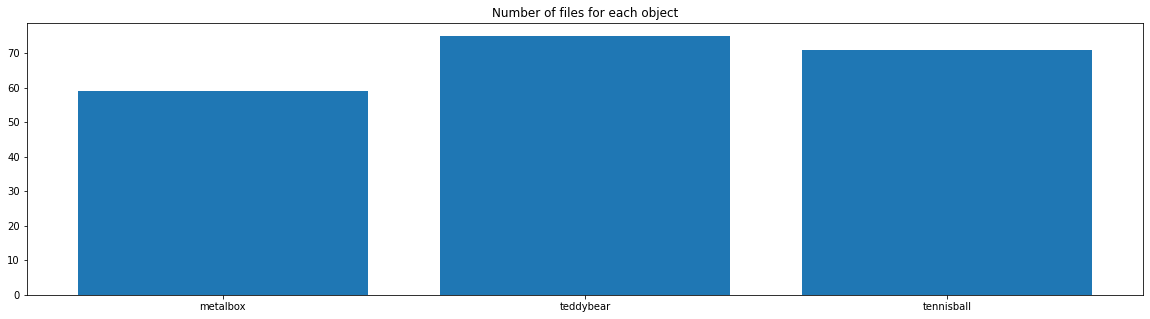

In [14]:
# A plot for showing the number of files extracted for each object 
counts = Counter(labels)
label_names, label_counts = zip(*counts.items())
indexes = np.arange(len(label_names))
fig, ax = plt.subplots(1,1,figsize = (20,5))
ax.bar(label_names,label_counts)
ax.set_title("Number of files for each object")
plt.show()

In [15]:
# A dictionary which maps each named feature to an index, this is used for extracting individual features and subgroups of features 
feature_dict = {    
    # Statistical Descriptions of raw data  
    'x_min':0, 
    'x_max':1, 
    'x_std':2,
    'y_min':3,
    'y_max':4,
    'y_std':5,
    'z_min':6, 
    'z_max':7,
    'z_std':8,

    # Statistical Descriptions of data averaged by each taxel 
    'x_avg_max':9, 
    'x_avg_min':10, 
    'x_avg_std':11,
    'y_avg_max':12, 
    'y_avg_min':13, 
    'y_avg_std':14, 
    'z_avg_max':15,
    'z_avg_min':16, 
    'z_avg_std':17,

    # Statistical Descriptions of the sum of forces within each frame 
    'x_total_min':18, 
    'x_total_max':19,
    'y_total_min':20, 
    'y_total_max':21,
    'z_total_max':22,
    'z_total_min':23,
    'x_sum_std':24,
    'y_sum_std':25,
    'z_sum_std':26,

    # Features based on the length of observed interaction 
    'duration':27, 
    'partial_contact':28, 

    # Features describing the different balances of normal (Z) and shear forces (X/Y)
    'force_ratio1':29, 
    'force_ratio2':30, 

    # Features describing the number of frames where consecutive changes / stability is observed
    'max_changes':31, 
    'total_frames_at_max':32, 
    'change_perc':33, 
    'max_stability': 34, 

    # Features describing the number of taxels compressed when maximum z-force observed 
    'compressed_taxels':35, 

    # Features describing the direction of the shear forces at point of maximum z-force 
     'xy_corr':36, 
     'x_corr':37, 
     'y_corr':38,
     'xy_neg_corr':39,
     'symmetry':40, 
     'parallel':41,
    
    # Dynamic Features - Compression     
    'mean_compression':42, 
    'std_compression':43,
    'max_compression':44,
    'most_commonly_compressed':45,

    # Dynamic Features - Initial Contact     
    'delta_x':46, 
    'delta_y':47,
    'delta_z':48, 
    'delta_tact':49,
    'delta_max_taxel':50,
    
    # Dynamic Features - Forces     
    'mean_x2_1':51,'mean_x2_2':52,'mean_x2_3':53,
    'mean_y2_1':54,'mean_y2_2':55,'mean_y2_3':56,
    'mean_z2_1':57,'mean_z2_2':58,'mean_z2_3':59,
    'std_x2_1':60,'std_x2_2':61,'std_x2_3':62,
    'std_y2_1':63,'std_y2_2':64,'std_y2_3':65,
    'std_z2_1':66,'std_z2_2':67,'std_z2_3':68,
    
}



In [16]:
def select_desired_features(full_features, desired_features, feature_dict): 
    """
    A function which reduces a feature set down to only the desired features specified in a list 
    Features must match with keys stored in the passed dictionary 
    """
    
    print(f"{features.shape[1]} attributes available for selection")
    feature_index_list = []
    for i in desired_features: 
        feature_index_list.append(feature_dict[i])
    new_features = features[:,feature_index_list]  
    print(f"{new_features.shape[1]} attributes selected for classification")
    return new_features



In [17]:
desired_features = [
    # Statistical Descriptions of raw data  
    'x_min', 
    'x_max', 
    'x_std',
    'y_min',
    'y_max',
    'y_std',
    'z_min', 
    'z_max',
    'z_std',

    # Statistical Descriptions of data averaged by each taxel 
    'x_avg_max', 
    'x_avg_min', 
    'x_avg_std',
    'y_avg_max', 
    'y_avg_min', 
    'y_avg_std', 
    'z_avg_max',
    'z_avg_min', 
    'z_avg_std',

    # Statistical Descriptions of the sum of forces within each frame 
    'x_total_min', 
    'x_total_max',
    'y_total_min', 
    'y_total_max',
    'z_total_max',
    'z_total_min',
    'x_sum_std',
    'y_sum_std',
    'z_sum_std',

    # Features based on the length of observed interaction 
    'duration', 
    'partial_contact', 

    # Features describing the different balances of normal (Z) and shear forces (X/Y)
    'force_ratio1', 
    'force_ratio2', 

    # Features describing the number of frames where consecutive changes / stability is observed
    'max_changes', 
    'total_frames_at_max', 
    'change_perc', 
    'max_stability', 

    # Features describing the number of taxels compressed when maximum z-force observed 
    'compressed_taxels', 

    # Features describing the direction of the shear forces at point of maximum z-force 
     'xy_corr', 
     'x_corr', 
     'y_corr',
     'xy_neg_corr',
     'symmetry', 
     'parallel',
    
    # Dynamic Features - Compression     
    'mean_compression', 
    'std_compression',
    'max_compression',
    'most_commonly_compressed',

    # Dynamic Features - Initial Contact     
    'delta_x', 
    'delta_y',
    'delta_z', 
    'delta_tact',
    'delta_max_taxel',
    
    # Dynamic Features - Forces     
    'mean_x2_1','mean_x2_2','mean_x2_3',
    'mean_y2_1','mean_y2_2','mean_y2_3',
    'mean_z2_1','mean_z2_2','mean_z2_3',
    'std_x2_1','std_x2_2','std_x2_3',
    'std_y2_1','std_y2_2','std_y2_3',
    'std_z2_1','std_z2_2','std_z2_3'
]

new_features = select_desired_features(features, desired_features, feature_dict)
features = new_features

69 attributes available for selection
69 attributes selected for classification


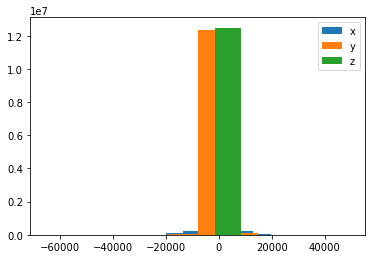

In [18]:
# Plotting distributions for the raw data extracted for each force
plt.hist(data[0], label = 'x')
plt.hist(data[1], label = 'y')
plt.hist(data[2], label = 'z')
plt.legend()

 Mean sum of tact data: 746.1


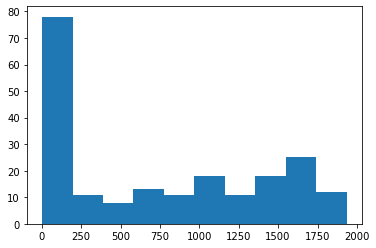

In [20]:
# Plotting the distribution of the sum of recorded tactile changes for all objects
tact_sum = data[3]
plt.hist(tact_sum)
tact_sum = np.array(tact_sum)  
print(f" Mean sum of tact data: {np.mean(tact_sum):.1f}")

In [21]:
# A method of creating training and test data using a stratified approach, so that each object is represented in training and text examples
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)
sss.get_n_splits(features,labels)

for train_index, test_index in sss.split(features,labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [22]:
# Selecting the K best variables for inspection purposes
if settings_dict['k_best']: 
    selector = SelectKBest(f_classif, k=10)
    selector.fit(X_train, y_train)
    X_train = selector.transform(X_train)
    for i in selector.get_support(indices = True): 
        for j in feature_dict.items(): 
            if j[1] == i: 
                print(j[0])
    X_test = selector.transform(X_test)
#     features = SelectKBest(chi2, k =10).fit_transform(features, labels)

X_train.shape

(143, 69)

In [23]:
# Fitting a kNN classifier on the training data
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

85.5% accurately identified


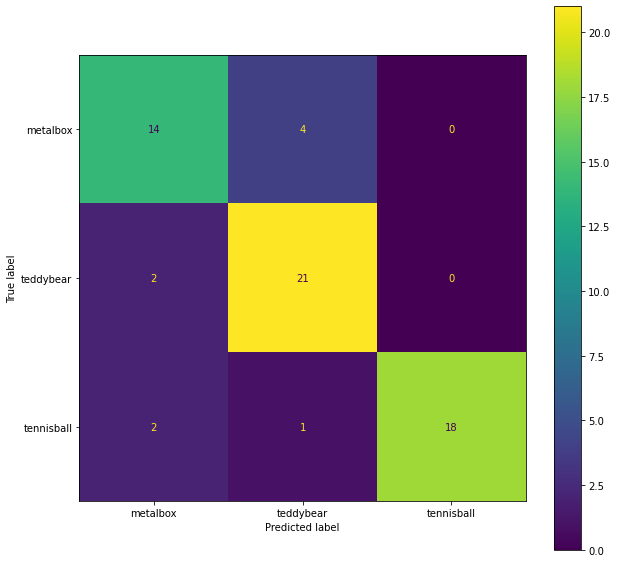

In [24]:
# Plotting a confusion matrix using the trained classifier on the validation dataset
fig, ax = plt.subplots(figsize = (10,10))
print(f"{np.sum(neigh.predict(X_test)==y_test)/len(y_test)*100:.1f}% accurately identified")
plot_confusion_matrix(neigh,X_test, y_test, ax = ax)

In [40]:
# Using dataframes to visualise the training data 
train_data = pd.DataFrame(X_train, columns = desired_features)
train_labels = pd.DataFrame(y_train)
train_data['Label'] = train_labels

pd.set_option('display.max_colwidth',None)
train_data

,x_min,x_max,x_std,y_min,y_max,y_std,z_min,z_max,z_std,x_avg_max,...,std_x2_1,std_x2_2,std_x2_3,std_y2_1,std_y2_2,std_y2_3,std_z2_1,std_z2_2,std_z2_3,Label
0,0.586749,-0.689972,-0.865962,0.318727,0.289086,-0.366021,0.291572,-0.327415,-0.711192,-0.557558,...,-0.221526,-0.512092,-0.716547,-0.109482,-0.395821,-0.495168,-0.126212,-0.370118,-0.804098,metalbox
1,-1.448705,-0.710958,1.489814,0.048631,-0.318124,0.223006,0.286842,0.196400,0.379909,-0.731092,...,0.515202,0.052155,2.216542,-0.091728,0.901475,0.229775,-0.080525,-0.235800,0.369530,tennisball
2,-0.948790,0.617105,1.077277,-0.044092,0.772064,0.815804,0.307899,0.217847,0.461196,0.249651,...,0.108901,0.304704,1.432565,-0.071795,1.049909,2.180261,-0.099445,-0.012526,1.075357,tennisball
3,0.934673,2.208192,1.615814,0.327581,1.310850,0.166749,0.306754,0.182768,0.522404,2.788725,...,0.566385,0.098031,4.040279,-0.084737,7.765010,0.070174,-0.106806,-0.148385,1.474385,metalbox
4,0.893536,-0.789481,-0.912132,0.450056,-0.408718,-0.473514,0.305381,-0.848686,-0.697501,-0.651348,...,-0.223365,-0.518638,-0.720621,-0.115067,-0.551164,-0.540358,-0.134306,-0.369758,-0.805940,teddybear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1.266929,1.062183,0.203609,-4.179606,-0.203639,0.143102,-3.449372,1.871810,0.314259,0.834589,...,-0.096055,0.134673,-0.665923,0.588615,-0.410721,-0.496789,0.781775,0.030859,-0.662063,metalbox
139,0.816472,-0.672134,-0.804488,0.410459,-0.337236,-0.401882,0.309196,-0.596775,-0.360808,-0.581382,...,-0.221434,-0.508659,-0.710116,-0.114923,-0.518568,-0.531444,-0.131387,-0.081503,-0.615567,teddybear
140,-1.482896,-0.760275,1.163713,0.141709,0.179762,0.195783,0.290428,0.161685,0.171018,-0.732051,...,-0.038224,-0.442099,1.319497,-0.096962,-0.340682,0.108522,-0.113641,-0.375686,0.053211,tennisball
141,-1.217245,0.534385,1.140834,-0.146804,1.231532,1.271027,0.308280,0.210759,0.645039,0.652326,...,-0.058786,0.601981,1.554644,-0.080007,0.575540,4.244987,-0.121914,-0.128724,1.731410,tennisball


<AxesSubplot:xlabel='x_min', ylabel='max_compression'>

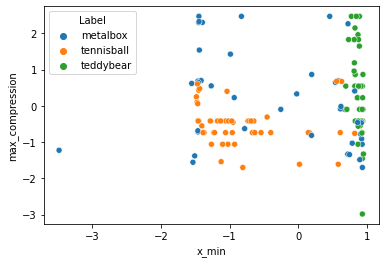

In [52]:
# Using 1D and 2D scatter plots to try and identify features which provide clear points of separation for different objects
sns.scatterplot(data = train_data, x= 'x_min', y = 'max_compression', hue = 'Label')

<AxesSubplot:xlabel='delta_x'>

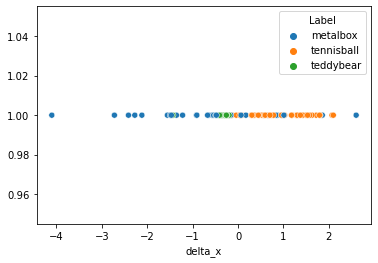

In [28]:
sns.scatterplot(data = train_data, x= 'delta_x',y=1, hue = 'Label')

In [29]:
def extract_file(obj, pose, exp):
    """ 
    A simpler version of the extract_features function which extracts only the raw data for a single object, 
    given a pose and experiment number for visualisation purposes
    
    """
    
    x_full = []
    y_full = []
    z_full = [] 

    
    file_path = object_path_dict[obj.lower()]['file']
    hf = h5py.File(file_path,'r')        
    obj_string = object_path_dict[obj.lower()]['object'] + '/Pose' + str(pose) + '/Exp' + str(exp)
    x_data = np.array(hf[obj_string + '/tactile_data_raw/x'])
    y_data = np.array(hf[obj_string + '/tactile_data_raw/y'])
    z_data = np.array(hf[obj_string + '/tactile_data_raw/z'])


    tactile_data = np.array(hf[obj_string + '/tactile_changes_label'])
    hf.close()
                  
    """
    Appending all data for inspection purposes
    """
    
    x_data = x_data.T
    y_data = y_data.T
    x_full = np.append([x.item() for x in x_data.flatten()],x_full)
    y_full = np.append([y.item() for y in y_data.flatten()],y_full)
    z_full = np.append([z.item() for z in z_data.flatten()],z_full)
    z_data = z_data.T
    z_full = np.append([z.item() for z in z_data.flatten()],z_full)

    
    return x_full, y_full, z_full

# Extracting data for a single object
x,y,z = extract_file('brush', pose = 1, exp = 5) 

<IPython.core.display.Javascript object>


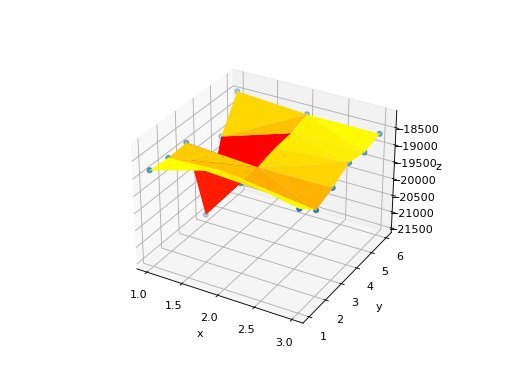

In [53]:
%matplotlib notebook

def scatter_plot_3d(x,y,z, frame, target): 
    """
    A function which maps the raw taxel readings for a given force (x/y/z) onto a 3D surface. 
    This was used as a visualisation technique to understand the changes in forces across frames.
    """
    x = x.reshape((-1,3))
    y = y.reshape((-1,3))
    z = z.reshape((-1,3))*-1
    
    if target == 'x': 
        z = x 
    elif target == 'y': 
        z = y
    
    grid_x = np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]])
    grid_y = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5],[6,6,6]])
    grid_z = []
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    i = frame
    
    for j in range(6):
        grid_z.append([z[i+j]])

    grid_x = grid_x.flatten()
    grid_y = grid_y.flatten()
    grid_z = np.array(grid_z).flatten()

    ax.scatter(grid_x,grid_y,grid_z)
    ax.plot_trisurf(grid_x, grid_y, grid_z, cmap = 'autumn')
    
    ax.plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    plt.pause(0.05)
    

scatter_plot_3d(x,y,z, frame = 11,target = 'z')

144 162


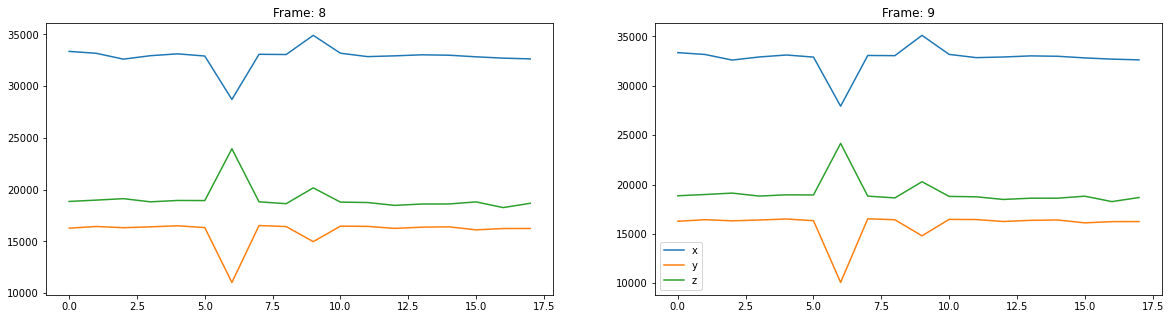

In [31]:
%matplotlib inline
def compare_frames(x,y,z, frame):
    """
    Another function used to visualise how forces change between frames. 
    The user can input a frame which plots the x/y/z values for each taxel in the given frame and the consecutive frame
    """
    start = frame*18
    end = frame*18 + 18 
    print(start, end)
    fig, ax = plt.subplots(1,2, figsize = (20,5))
    ax[0].plot(x[start:end], label = 'x')
    ax[0].plot(y[start:end], label = 'y')
    ax[0].plot(z[start:end], label = 'z')
    ax[0].set_title(f'Frame: {frame}')

    start += 18
    end += 18
    ax[1].plot(x[start:end], label = 'x')
    ax[1].plot(y[start:end], label = 'y')
    ax[1].plot(z[start:end], label = 'z')
    ax[1].set_title(f'Frame: {frame+1}')
    ax[1].legend()

compare_frames(x,y,z, frame = 8)